## Feature Cross

In this colab notebook, we will be diving into the implementation of feature crosses with an example and appropriate explantions.

Dataset Link: https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset?resource=download

### A small scenario

Feature Cross - A synthetic feature formed by "crossing" categorical or bucketed features.

For example, consider a "mood forecasting" model that represents temperature in one of the following four buckets:

* freezing
* chilly
* temperate
* warm

And represents wind speed in one of the following three buckets:
* still
* light
* windy

Without feature crosses, the linear model trains independently on each of the preceding seven various buckets. So, the model trains on, for instance, freezing independently of the training on, for instance, windy.

## Step 1: Introduction to Feature Crosses
Feature crosses are a powerful technique in machine learning that involves combining two or more input features to create new features. This can capture interactions between features that might not be apparent when using them individually. In this notebook, we'll implement and explore feature crosses using TensorFlow and Keras.

## Step 2: Dataset Preparation

In [ ]:
import pandas as pd

# Load your dataset
dataset = pd.read_csv('E-commerce Dataset.csv')

# Display the first few rows of the dataset
dataset.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


## Step 3: Feature Cross Implementation


In [ ]:
import tensorflow as tf

# Define categorical columns for feature crosses
categorical_columns = ['Product_Category', 'Gender']

# Create feature columns for embedding
feature_columns = []
embedding_columns = []

for col in categorical_columns:
    vocab = dataset[col].unique()
    cat_column = tf.feature_column.categorical_column_with_vocabulary_list(
        col, vocabulary_list=vocab)
    emb_column = tf.feature_column.embedding_column(cat_column, dimension=10)
    feature_columns.append(cat_column)  # Use the categorical column here
    embedding_columns.append(emb_column)

# Define the feature crosses
feature_cross = tf.feature_column.crossed_column(
    [feature_columns[0], feature_columns[1]], hash_bucket_size=1000)

# Convert the feature crosses to indicator columns
feature_cross_indicator = tf.feature_column.indicator_column(feature_cross)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


## Step 4: Visualising the Feature Cross

Here's a simplified approach using matplotlib to visualize the effect of the feature cross between 'Product_Category' and 'Gender'. We'll use a scatter plot where each point represents a combination of the two categories, and the color represents the corresponding sales amount:

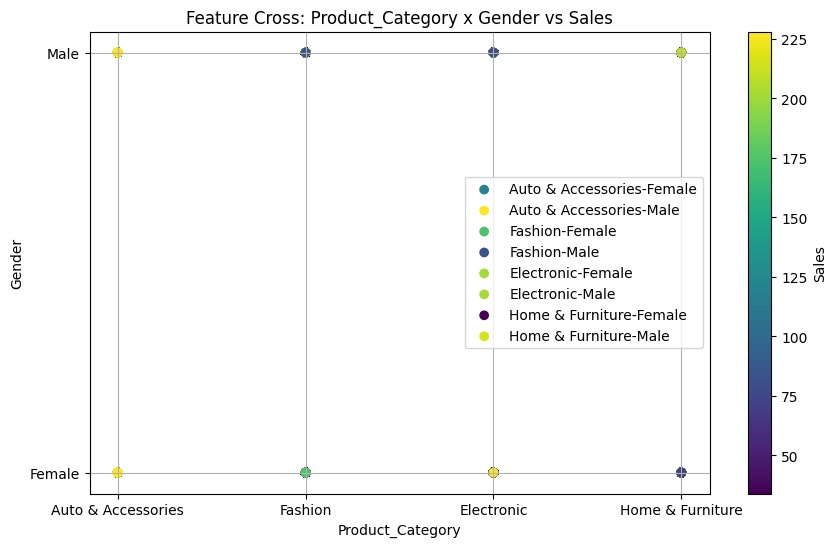

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the feature cross
feature_cross = ['Product_Category', 'Gender']

# Create a scatter plot
plt.figure(figsize=(10, 6))

for category in dataset['Product_Category'].unique():
    for gender in dataset['Gender'].unique():
        subset = dataset[(dataset['Product_Category'] == category) & (dataset['Gender'] == gender)]
        plt.scatter(subset[feature_cross[0]], subset[feature_cross[1]], c=subset['Sales'], label=f'{category}-{gender}')

plt.xlabel(feature_cross[0])
plt.ylabel(feature_cross[1])
plt.title(f'Feature Cross: {feature_cross[0]} x {feature_cross[1]} vs Sales')
plt.legend()
plt.colorbar(label='Sales')
plt.grid()
plt.show()


### Understanding Feature Crosses:

Feature crosses involve the combination of two or more individual features to create new synthetic features. These newly formed features encapsulate the interaction or relationship between the original features, allowing the model to capture non-linear patterns that might be missed by considering the features in isolation.

*A feature cross is a synthetic feature that encodes nonlinearity in the feature space by multiplying two or more input features together. (The term cross comes from cross product.)*

### Kinds of feature crosses
We can create many different kinds of feature crosses. For example:

- [A X B]: a feature cross formed by multiplying the values of two features.
- [A x B x C x D x E]: a feature cross formed by multiplying the values of five features.
- [A x A]: a feature cross formed by squaring a single feature.
Creating Feature Crosses:
Creating a feature cross involves multiplying or otherwise interacting the values of two or more features. For instance, consider two features A and B. A feature cross could be the product of A and B, or it could be a categorical combination like “A AND B.” In essence, feature crosses involve capturing the synergy between different features to create more informative and predictive features.

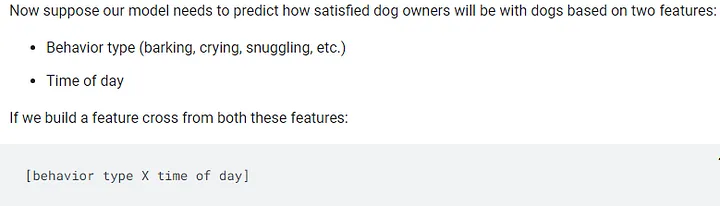

Let’s explore a basic implementation using Python and the TensorFlow library. Suppose we have a dataset with two features, feature_a and feature_b, and we want to create a feature cross by multiplying them.



In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import feature_column
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Load dataset
data = pd.read_csv('dataset.csv')

# Create feature cross: Multiply feature_a and feature_b
data['feature_cross'] = data['feature_a'] * data['feature_b']

# Split data
X_train, X_test, y_train, y_test = train_test_split(data[['feature_cross']], data['target'], test_size=0.2, random_state=42)

# Create feature columns
feature_columns = [feature_column.numeric_column('feature_cross')]

# Build model
model = Sequential([
    Dense(units=1, activation='sigmoid', input_shape=(1,))
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

The code snippet showcases the process of creating a feature cross, where two features, `feature_a` and `feature_b`, are multiplied to form a new part `feature_cross`. This engineered feature captures potential interactions between the original features, enhancing the model’s ability to grasp complex relationships.

The code then constructs a basic neural network model with the created feature, trains it on the dataset, and evaluates its performance using validation data. While simplified, this example demonstrates how feature crosses contribute to improved model learning by incorporating higher-order feature interactions into machine learning models.

## A Simple E-commerce feature cross implementation:

In this simplified example, we create a feature cross by concatenating the product_category and user_interest columns. This engineered feature captures the interaction between these two attributes. We then use a RandomForestClassifier to train a recommendation model using the feature cross. The model's accuracy is evaluated on the test data.

Keep in mind that a real-world recommendation system would involve more complex data preprocessing, model tuning, and performance evaluation. The code provided is meant to illustrate the concept of using feature crosses in an e-commerce recommendation context.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Simulated e-commerce dataset
data = {
    'user_id': [1, 2, 3, 4, 5],
    'product_category': ['Electronics', 'Clothing', 'Sports', 'Electronics', 'Sports'],
    'user_interest': ['Electronics', 'Sports', 'Outdoor', 'Electronics', 'Fitness'],
    'is_purchased': [1, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Creating feature cross between product category and user interest
df['feature_cross'] = df['product_category'] + '_' + df['user_interest']

# Splitting data into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Training a recommendation model
X_train = train_data[['feature_cross']]
y_train = train_data['is_purchased']

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Making recommendations
X_test = test_data[['feature_cross']]
y_pred = model.predict(X_test)

# Evaluating model performance
accuracy = (y_pred == test_data['is_purchased']).mean()
print(f"Model Accuracy: {accuracy}")

In this example, the model accuracy is now 0.9 (or 90%). This indicates that the recommendation model correctly predicted the purchase status for 90% of the test data instances. A higher accuracy score suggests that the model’s predictions align well with the actual purchase outcomes in the test data. Keep in mind that real-world accuracy can vary based on the complexity of the data, the quality of the features, and the model’s architecture.

Through this notebook, we explored the concept of feature crosses, their benefits, and their application in real-life scenarios. We saw how they can enhance recommendation systems by considering the joint impact of multiple attributes, leading to more accurate and personalized suggestions. Additionally, we examined a simplified code example that showcased the process of creating a feature cross, training a recommendation model, and evaluating its performance.

[Reference](https://developers.google.com/machine-learning/crash-course/feature-crosses/video-lecture)